# 词向量

## 读入数据

In [2]:
import pandas as pd
df = pd.read_excel('text_analysis_ad_sample.xlsx', )
df

,Unnamed: 0,index,商品名称,商品类别,出版年,广告文本,广告标题
0,0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟"""
1,1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也'
2,2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花"""
3,3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片"""
4,4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友"""
...,...,...,...,...,...,...,...
495,495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产"""
496,496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺"""
497,497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果"""
498,498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六"""


## 分词

In [3]:
# Import the jieba library, which is commonly used for Chinese word segmentation.
import jieba

# Define a function named clean_text to perform word segmentation on the input text.
# This function takes a text string as input, segments it using jieba, and joins the segmented words with spaces.
def clean_text(text):
    # Use jieba's lcut method to segment the input text into a list of words.
    # The lcut method returns a list containing each segmented word.
    words = jieba.lcut(text)
    # Join the words in the list with a space and return the resulting string.
    return ' '.join(words)

# Assume df is a Pandas DataFrame. Get the first value from the '广告文本' column.
# This value is used as a test case for the clean_text function.
test = df['广告文本'][0]
# Call the clean_text function to segment the test text and get the segmented result.
clean_text(test)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9x/j_7cm_y109b5sg5tpf7h7gxm0000gn/T/jieba.cache
Loading model cost 0.277 seconds.
Prefix dict has been built successfully.


'兰勃 脱白 脱勒 公司   五华 牌 香烟   佛及 尼埃 香烟     二十 枝装 每包 售 国币 大洋 二角   五十 枝装 每罐 售 国币 大洋   五角'

In [4]:
df['广告文本分词'] = df['广告文本'].apply(clean_text)
df

,Unnamed: 0,index,商品名称,商品类别,出版年,广告文本,广告标题,广告文本分词
0,0,1596,五华牌香烟[May Blossom],烟草制品,1932,兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟 二十枝装每包售国币大洋二角 五十枝装每罐售国币...,"五华牌香烟,""兰勃脱白脱勒公司 五华牌香烟 佛及尼埃香烟""",兰勃 脱白 脱勒 公司 五华 牌 香烟 佛及 尼埃 香烟 二十 枝装 每包 ...
1,1,5627,韦廉士红色清导丸[Dr.Willams' Pink Pills For Pale People],药品,1918,讲求卫生为人生本性天理固然也 人生首贵逐日大便通畅有序为天然所当如此也如若大便不利大肠阻塞则...,韦廉士红色清导丸:'讲求卫生为人生本性天理固然也',讲求 卫生 为 人生 本性 天理 固然 也 人生 首贵 逐日 大便 通畅 有序 为 天然...
2,2,13532,大炮台香烟[Three Castles Cigarettes],烟草制品,1935,"香味馥郁,不让名花 另有三炮台出售","大炮台香烟,""香味馥郁 不让名花""","香味 馥郁 , 不让 名花 另 有 三 炮台 出售"
3,3,1133,婴孩自己药片[Baby's Own],药品,1930,差肩儿女 秀慧康强 闽有佳音讃羡婴孩自己药片 每年此际小儿患肠胃病者甚多而尤以南方各地天气翳...,"婴孩自己药片,""差肩儿女 秀慧康强 闽有佳音赞美婴孩自己药片""",差肩 儿女 秀慧 康强 闽有 佳音 讃 羡 婴孩 自己 药片 每年 此际 小儿 ...
4,4,3146,亚士北罗药片[Aspro],药品,1933,何以亚士北罗是妇女们的腻友？各国妇女力证亚士北罗药片是她们最需要的药物！为什么？她们的经验知...,"亚士北罗药片,""妇女之腻友""",何以 亚士 北罗 是 妇女 们 的 腻友 ？ 各国 妇女 力证 亚士 北罗 药片 是 她们 ...
...,...,...,...,...,...,...,...,...
495,495,14176,安住蚊烟香,化肥及杀虫剂,1935,安住蚊烟香 臭虫立毙药粉 世界第一名产 安住蚊烟香 蚊见逃慌慌 暑夜不用帐 包睡到天光 汉口...,"安住蚊烟香,""世界第一名产""",安住 蚊烟香 臭虫 立毙 药粉 世界 第一名 产 安住 蚊烟香 蚊见 逃 慌...
496,496,11610,第威德润肠丸[DeWitt's],药品,1934,眉色清秀 气色壮旺 此第威德润肠丸之功也 第威德润肠丸系以草药炼制纯粹和平十分安全功能清理肠...,"第威德润肠丸,""眉色清秀 气色壮旺""",眉色 清秀 气色 壮旺 此 第 威德 润肠 丸 之功 也 第 威德 润肠 丸系 ...
497,497,10256,如意膏[She-Ko],药品,1934,汤火烫伤 立攃如意膏可免严重之后果 皮肤受伤当以灼烫最痛苦其又因此震激而致命者治疗灼烫止痛消...,"如意膏,""汤火烫伤 立攃如意膏可免严重之后果""",汤火 烫伤 立 攃 如意 膏 可免 严重 之 后果 皮肤 受伤 当以 灼烫 最 痛苦...
498,498,9176,六零六药膏,药品,1923,清血解毒六零六 花柳梅毒瘰*疮疖癣疥**及筋骨酸痛四肢麻木半身疯*等症状虽异其发生之原理莫不...,"六零六,""清血解毒六零六""",清血 解毒 六零 六 花柳 梅毒 瘰 * 疮 疖 癣疥 * * 及 筋骨 酸痛 四肢 麻...


In [5]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

## 构造词向量模型训练语料库

In [6]:
# 从 '广告文本分词' 列获取数据，按空格分割后转为列表
corpus = df['广告文本分词'].apply(lambda x: x.split()).tolist()
# 过滤掉每个文档里长度为 1 的词
corpus = [[word for word in document if len(word) != 1] for document in corpus]
# 打印前 5 个文档
for document in corpus[:5]:
    print(document)

['兰勃', '脱白', '脱勒', '公司', '五华', '香烟', '佛及', '尼埃', '香烟', '二十', '枝装', '每包', '国币', '大洋', '二角', '五十', '枝装', '每罐', '国币', '大洋', '五角']
['讲求', '卫生', '人生', '本性', '天理', '固然', '人生', '首贵', '逐日', '大便', '通畅', '有序', '天然', '所当', '如此', '如若', '大便', '不利', '肠阻塞', '胃失', '消化', '疾病', '头痛', '肝火', '上升', '胆汁', '口气', '积浊', '舌现', '黄苔', '诸恙', '接踵', '此皆须', '服用', '韦廉士', '医生', '红色', '清导丸', '以利', '大便', '俾得', '体质', '强健', '百病', '不侵', '也况', '此丸', '功力', '天然', '平和', '不尚', '霸烈', '广东省', '医生', '研究会', '先生', '来示', '云弟', '患大', '便秘', '结之症', '一月', '有余', '困苦', '万状', '难以', '言喻', '服用', '韦廉士', '红色', '清导丸', '数粒', '大便', '畅达', '于是', '常为', '服用', '身体', '爽健为', '半生', '以来', '未有', '尊处', '无从', '购买', '韦廉士', '红色', '清导丸', '祈即', '邮票', '大洋', '六角', '上海', '四川', '九十六', '韦廉士', '医生', '药局', '原班', '邮奉', '一瓶']
['香味', '馥郁', '不让', '名花', '炮台', '出售']
['差肩', '儿女', '秀慧', '康强', '闽有', '佳音', '婴孩', '自己', '药片', '每年', '此际', '小儿', '肠胃病', '尤以', '南方', '各地', '天气', '充斥', '之区', '然而', '刘君', '福州', '南台', '梅亭', '山馆', '家有', '差肩', '儿女', '秀慧康', '强者', '果何法', '以致', '之乎', '刘君云', '鄙人', 

## 训练词向量模型

In [7]:
# Import the Word2Vec class from the gensim.models module.
# Word2Vec is a popular algorithm for learning word embeddings from text data.
from gensim.models import Word2Vec

# Initialize and train a Word2Vec model.
# The Word2Vec model learns vector representations (embeddings) for words in the corpus.
model = Word2Vec(
    corpus  # The input corpus, which should be an iterable of sentences. Each sentence is a list of words.
    # window=5,  # The maximum distance between the current and predicted word within a sentence.
    # min_count=1,  # Ignores all words with a total frequency lower than this value.
    # epochs=10,  # Number of iterations (epochs) over the corpus during training.
    # vector_size=100  # Dimensionality of the word vectors.
)

## 呈现词向量

In [8]:
word_list = model.wv.index_to_key
words_vectors = model.wv[word_list]

for word, vector in zip(word_list[:5], words_vectors[:5]):
    print(f"{word}: {vector}")

韦廉士: [-0.1715479   0.27942374  0.12578334  0.08241318  0.04957638 -0.5960049
  0.12311599  0.74062854 -0.15951225 -0.10008293 -0.19739203 -0.3541659
 -0.0633147   0.17050073  0.0697918  -0.26342043  0.06273206 -0.48775405
  0.00200529 -0.6519053   0.18702728  0.15116516  0.10127913 -0.17131333
 -0.1182645   0.03900319 -0.42536023 -0.37278223 -0.23763219  0.03213088
  0.35580638 -0.01388372  0.08960783 -0.26915142 -0.26494053  0.36416072
 -0.05218248 -0.3914112  -0.3088916  -0.68256277 -0.10845174 -0.2564537
 -0.06802964  0.11149511  0.30273706 -0.23541673 -0.32342425 -0.0592501
  0.20593037  0.2807532   0.18626928 -0.29405424 -0.13856463 -0.00564668
 -0.20131026  0.12340149  0.15306339 -0.07437227 -0.40683264  0.10767611
  0.15860337  0.18925484 -0.11314678 -0.00736923 -0.44895792  0.24550408
  0.05966679  0.21240991 -0.40820593  0.34733507 -0.16797897  0.23583728
  0.26608965 -0.05003479  0.3668518   0.2132521  -0.00135723 -0.10848528
 -0.26850578  0.13490638 -0.17841385  0.05944124 -

In [9]:
model.wv.most_similar('美容')

[('发生', 0.9966244697570801),
 ('卫生', 0.9966241121292114),
 ('消化', 0.9966128468513489),
 ('不能', 0.9966016411781311),
 ('功效', 0.9965858459472656),
 ('精神', 0.996584415435791),
 ('注意', 0.9965834021568298),
 ('身体', 0.9965799450874329),
 ('清导丸', 0.996518611907959),
 ('血液', 0.996504008769989)]

## 可视化

/opt/anaconda3/envs/causal/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Hiragino Sans GB.
  fig.canvas.print_figure(bytes_io, **kw)


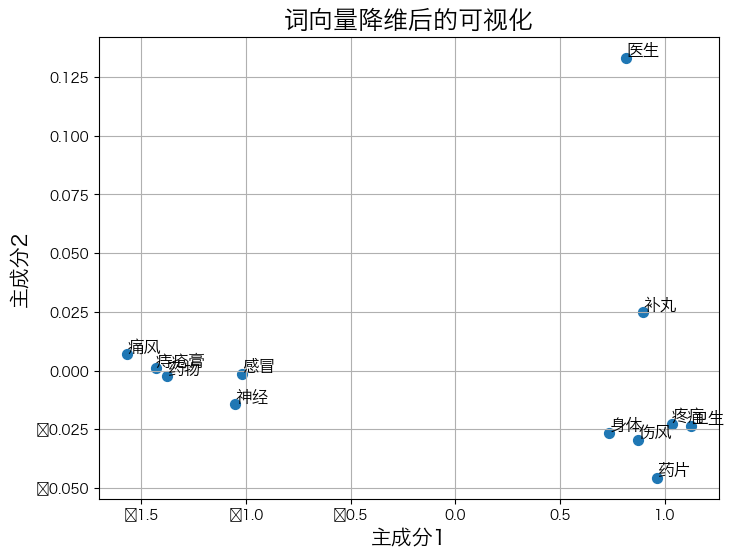

In [ ]:
words = ['医生', '疼痛', '神经', '痛风', '伤风', '卫生', '身体', '感冒', '药片', '补丸', '药物', '痔疮膏']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # 然后在这里填上任一字体即可，GPT说 "Hiragino Sans GB"是 macOS 默认的中文支持字体之一


plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=50)
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0]+0.001, reduced_vectors[i, 1]+0.001), fontsize=12)

plt.xlabel('主成分1',fontsize=15)
plt.ylabel('主成分2',fontsize=15)

plt.title('词向量降维后的可视化',fontsize=18)
plt.grid(True)
plt.show()


## loss&loss曲线

Loss after epoch 0: 28218.6640625
Loss after epoch 1: 24314.35546875
Loss after epoch 2: 20417.72265625
Loss after epoch 3: 17285.1015625
Loss after epoch 4: 15888.0625
Loss after epoch 5: 15212.984375
Loss after epoch 6: 14733.96875
Loss after epoch 7: 14279.765625
Loss after epoch 8: 13782.296875
Loss after epoch 9: 13239.46875
Loss after epoch 10: 12746.515625
Loss after epoch 11: 12396.09375
Loss after epoch 12: 11709.15625
Loss after epoch 13: 11302.734375
Loss after epoch 14: 10857.515625
Loss after epoch 15: 10420.234375
Loss after epoch 16: 10328.875
Loss after epoch 17: 9518.703125
Loss after epoch 18: 9166.6875
Loss after epoch 19: 9072.4375
Loss after epoch 20: 8741.53125
Loss after epoch 21: 9695.5625
Loss after epoch 22: 8144.34375
Loss after epoch 23: 7697.875
Loss after epoch 24: 7472.15625
Loss after epoch 25: 7274.78125
Loss after epoch 26: 7115.59375
Loss after epoch 27: 6858.59375
Loss after epoch 28: 6662.28125
Loss after epoch 29: 6629.65625
Loss after epoch 30: 65

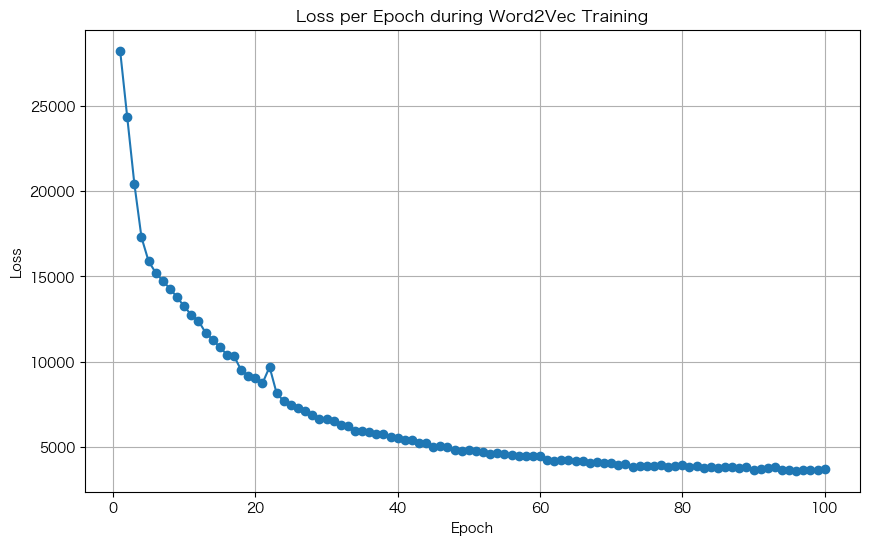

In [27]:
import matplotlib.pyplot as plt
from gensim.models.callbacks import CallbackAny2Vec
from gensim.models import Word2Vec
import logging

# 定义用于记录 loss 的回调类
class LossCallback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.loss_previous_step = 0.0
        self.losses = []  # 用于保存每个 epoch 的 loss

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_previous_step
        self.losses.append(loss_now)
        self.loss_previous_step = loss
        logging.info(f'Loss after epoch {self.epoch}: {loss_now}')
        print(f'Loss after epoch {self.epoch}: {loss_now}')
        self.epoch += 1

# 准备你的语料（替换为你的实际语料）
# corpus = [...]

# 实例化回调器
loss_logger = LossCallback()

# 训练模型
model = Word2Vec(corpus, epochs=100, compute_loss=True, callbacks=[loss_logger], seed=42)

# 绘制 loss 曲线
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_logger.losses) + 1), loss_logger.losses, marker='o')
plt.title('Loss per Epoch during Word2Vec Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('word2vec_loss_curve.jpg')  # 保存为图片
plt.show()
